## <Center> Logistic Regression Model: Car Data Preprocessing<Center>
###### <Center>*Compiled by Gabriella Cerrai*<Center> 

##### This is a logistic regresion model where the dependent variable is 'Price' of the car. Included in this notebook is preprocessing of the data - null values in the data set, outliers of the numeric variables, variable transformation, multicollinearity and introducing dummy variables for categorical variables in the data set.

##### **1. Import Packages:**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set()

import warnings
warnings.filterwarnings('ignore')

##### **2. Read in and check the data set:**

In [2]:
raw_data = pd.read_csv('Car Data Regression.csv')
# raw_data.head()

In [3]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


##### **3. Null Values:**
##### A rule of thumb: the null values can be dropped from a data set if the total number of observations for a variable comprises of 5% of null values, or less than 5%. 

In [4]:
# check how many null values there are
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
# extract null variables for 'Price' and 'Mileage'
price_count, engV_count  = raw_data.isnull().sum().get('Price'), raw_data.isnull().sum().get('EngineV')

In [6]:
# extract totals for 'Price' and 'Mileage'
totals = raw_data.describe().iloc[0:1,:]
totals

,Price,Mileage,EngineV,Year
count,4173.0,4345.0,4195.0,4345.0


In [7]:
price_total, engV_total = int(totals.get('Price')), int(totals.get('EngineV'))

In [8]:
# calculate percentage of nulls 
price_perc, engV_perc = price_count / price_total * 100, engV_count / engV_total * 100

In [9]:
print('Price null percentage is:', price_perc.round(2),'%')

Price null percentage is: 4.12 %


In [10]:
print('Engine Volume null percentage is:', engV_perc.round(2),'%')

Engine Volume null percentage is: 3.58 %


##### As seen above, for both 'Price' and 'Mileage', the total number of null values is less than 5%. Therefore, we can drop all of the null values in the data set.

In [11]:
data_no_nulls = raw_data.dropna(axis = 0)

In [12]:
# check that all of the null values have been dropped:
data_no_nulls.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [13]:
# checkpoint 1: 
data = data_no_nulls.copy()

##### 4. Removing Outliers:

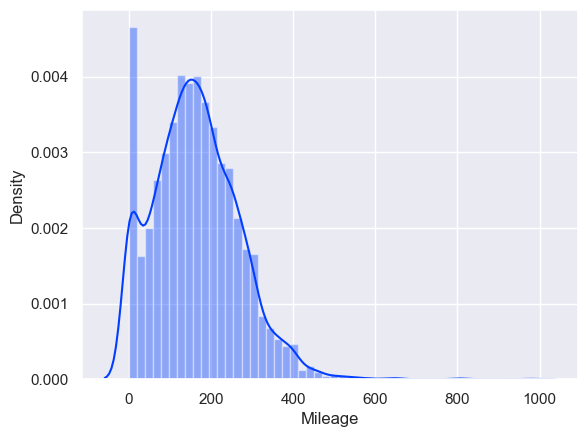

In [14]:
sns.set_palette('bright')
sns.distplot(data['Mileage']);

In [15]:
x = data['Mileage'].quantile(0.99)
x

434.5199999999995

In [16]:
data_1 = data[data['Mileage'] < x] 

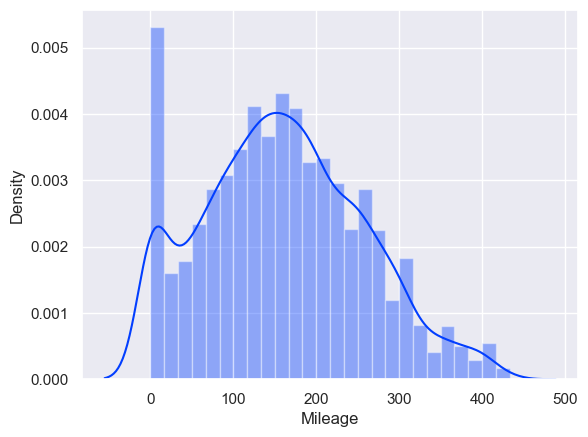

In [17]:
sns.distplot(data_1['Mileage']);

In [18]:
data_2 = data_1[data_1['EngineV'] < 6.5]

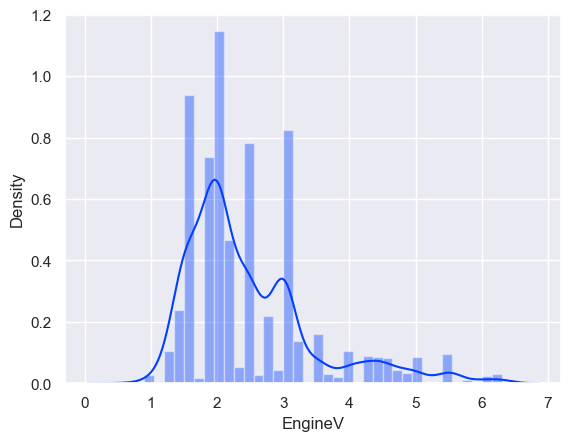

In [19]:
sns.distplot(data_2['EngineV']);

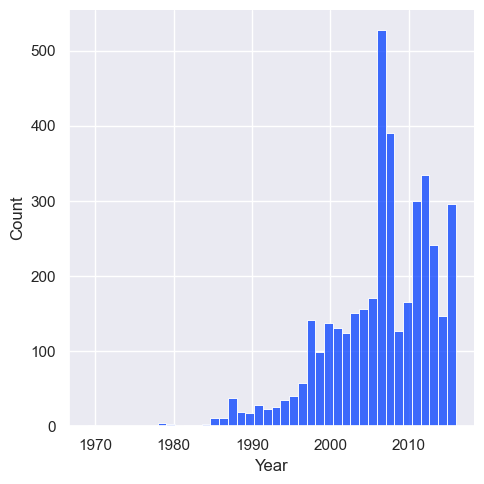

In [20]:
sns.displot(data_2['Year'], );
# can see the data is skewed due to the older models of cars

In [21]:
y = data_2['Year'].quantile(0.01)
y

1987.0

In [22]:
data_3 = data_2[data_2['Year'] > y]

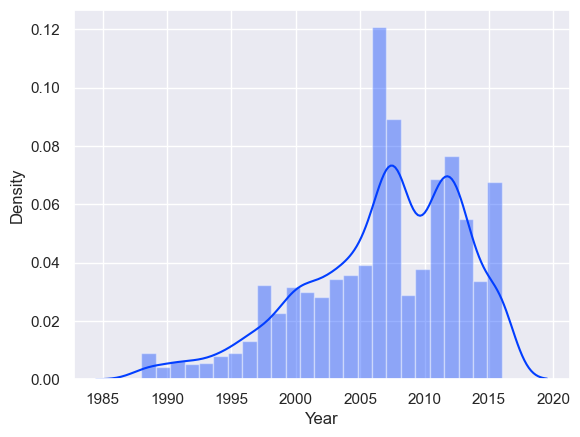

In [23]:
sns.distplot(data_3['Year']);

In [24]:
# checkpoint 2:
clean_data = data_3.reset_index(drop = True).copy()

##### **5. Transformation of Data:** 
##### As seen in *Figures 1.1, 1.2* and *1.3* below, the explanatory variables 'Year', 'Mileage' and 'EngineV' all have an exponential relationship with 'Price'. Therefore, we transform 'Price' and plot the logarithm of 'Price' against each of the variables in *Figures 2.1, 2.2* and *2.3*. When the logarithm of 'Price' is plotted against the three explanatory variables, a linear relationship can be seen in the scatterplots. 

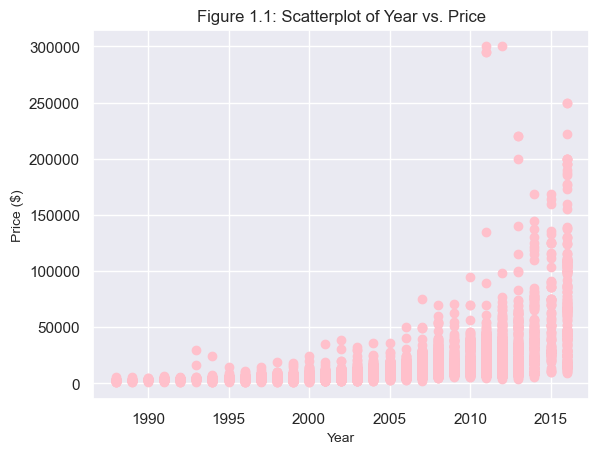

In [25]:
plt.scatter(clean_data['Year'], clean_data['Price'], color = 'pink')
plt.xlabel('Year', size = 10)
plt.ylabel('Price ($)', size = 10)
plt.title('Figure 1.1: Scatterplot of Year vs. Price');

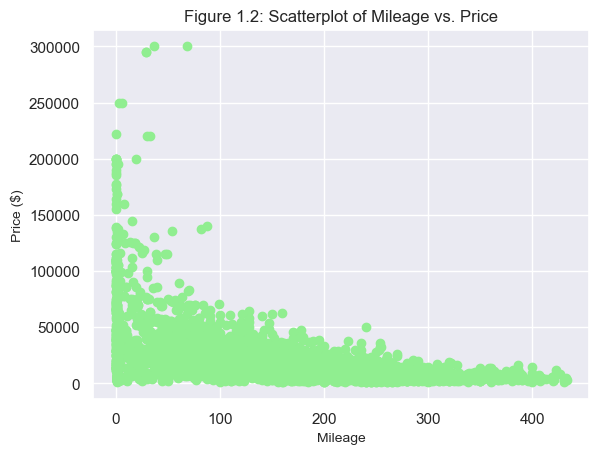

In [26]:
plt.scatter(clean_data['Mileage'], clean_data['Price'], color = 'lightgreen')
plt.xlabel('Mileage', size = 10)
plt.ylabel('Price ($)', size = 10)
plt.title('Figure 1.2: Scatterplot of Mileage vs. Price');

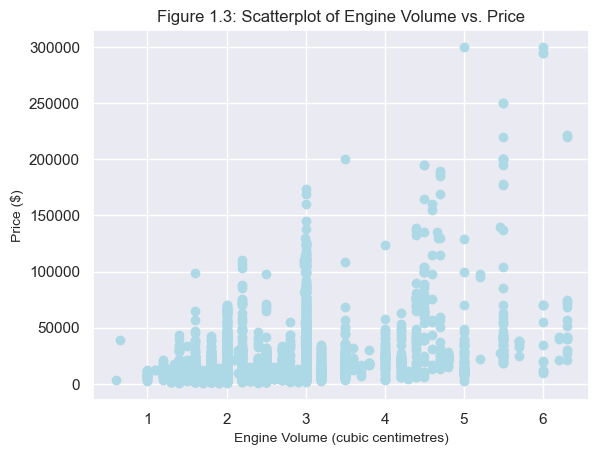

In [27]:
plt.scatter(clean_data['EngineV'], clean_data['Price'], color = 'lightblue')
plt.xlabel('Engine Volume (cubic centimetres)', size = 10)
plt.ylabel('Price ($)', size = 10)
plt.title('Figure 1.3: Scatterplot of Engine Volume vs. Price');

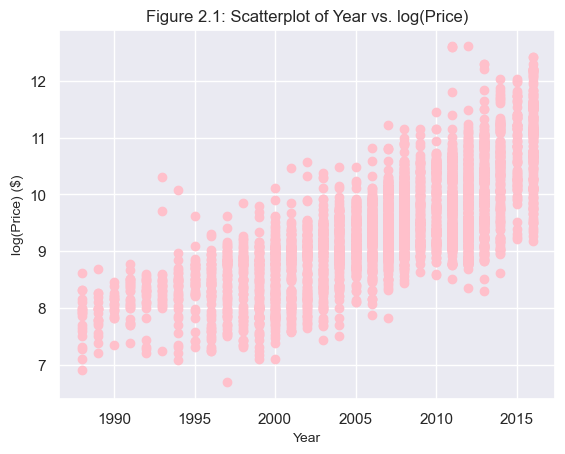

In [28]:
plt.scatter(clean_data['Year'], np.log(clean_data['Price']), color = 'pink')
plt.xlabel('Year', size = 10)
plt.ylabel('log(Price) ($)', size = 10)
plt.title('Figure 2.1: Scatterplot of Year vs. log(Price)');

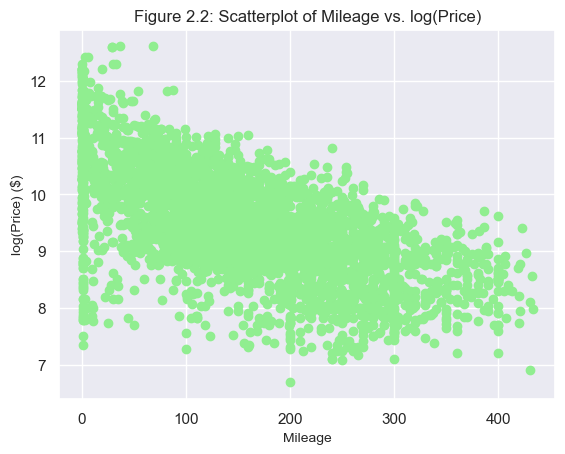

In [29]:
plt.scatter(clean_data['Mileage'], np.log(clean_data['Price']), color = 'lightgreen')
plt.xlabel('Mileage', size = 10)
plt.ylabel('log(Price) ($)', size = 10)
plt.title('Figure 2.2: Scatterplot of Mileage vs. log(Price)');

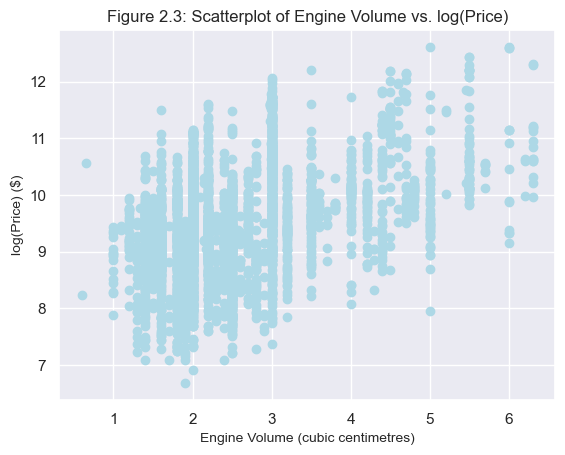

In [30]:
plt.scatter(clean_data['EngineV'], np.log(clean_data['Price']), color = 'lightblue')
plt.xlabel('Engine Volume (cubic centimetres)', size = 10)
plt.ylabel('log(Price) ($)', size = 10)
plt.title('Figure 2.3: Scatterplot of Engine Volume vs. log(Price)');

In [31]:
# log transformation on 'Price' in the dataframe: 
log_price = np.log(clean_data['Price'])

In [32]:
clean_data['Log Price'] = log_price
clean_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656


##### **6. Variance Inflation Factor:**

In [33]:
# numeric variables only: 
variables = clean_data[['Mileage', 'Year', 'EngineV']] 

In [34]:
# note: VIF = 1/(1-r2)
vifs = []
for i in range(variables.shape[1]):
    vifs.append(variance_inflation_factor(variables.values,i))
print(vifs)

[3.7032655679635607, 10.323287188000672, 7.400347557824418]


In [35]:
VIF = pd.DataFrame(data = None, columns = None)
VIF['Features'] = variables.columns
VIF['Variance Inflation Factor (VIF)'] = vifs
VIF

,Features,Variance Inflation Factor (VIF)
0,Mileage,3.703266
1,Year,10.323287
2,EngineV,7.400348


##### *Note:* a VIF of greater than 10 means that the explanatory variable is **too** highly correlated with the other explanatory variables in the model. Therefore, that variable should be removed from the dataframe and model to reduce the chance of confounding in the results. 

In [36]:
data_after_vif = clean_data.drop(['Year'], axis = 1).copy()
data_after_vif.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Model,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,Rav 4,9.814656


In [37]:
# second VIF check on remaining numeric variables of interest:
variables_2 = data_after_vif[['Mileage', 'EngineV']]

In [38]:
vif_no_year = []
for i in range(variables_2.shape[1]):
    vif_no_year.append(variance_inflation_factor(variables_2, i))
print(vif_no_year)

[2.6528458036986104, 2.6528458036986096]


In [39]:
vif_no_year[0] == vif_no_year[1]

False

In [40]:
VIF2 = pd.DataFrame(data = None, columns = None)
VIF2['Features'] = variables_2.columns
VIF2['Variance Inflation Factor (VIF)'] = vif_no_year
VIF2

,Features,Variance Inflation Factor (VIF)
0,Mileage,2.652846
1,EngineV,2.652846


##### **7. Introducing Dummy Variables:**

In [41]:
data_with_dummies = pd.get_dummies(data_after_vif, drop_first = True)

In [42]:
# rearrange columns so that 'Price' is the first column in the dataframe:
cols = ['Log Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
